In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import calendar

In [173]:
gdp = pd.read_csv('gdp_per_country.csv')

In [174]:
covid_data = pd.read_csv('covid_data_2020.csv')

In [175]:
covid_data[covid_data['Country_code'] == 'AT']

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
7440,1/3/20,AT,Austria,EURO,0,0,0,0
7441,1/4/20,AT,Austria,EURO,0,0,0,0
7442,1/5/20,AT,Austria,EURO,0,0,0,0
7443,1/6/20,AT,Austria,EURO,0,0,0,0
7444,1/7/20,AT,Austria,EURO,0,0,0,0
...,...,...,...,...,...,...,...,...
8055,9/9/21,AT,Austria,EURO,2505,697910,6,10610
8056,9/10/21,AT,Austria,EURO,2157,700067,3,10613
8057,9/11/21,AT,Austria,EURO,2259,702326,5,10618
8058,9/12/21,AT,Austria,EURO,2431,704757,5,10623


In [176]:
gdp.head()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,GDP 2016,GDP 2017,GDP 2018,GDP 2019,GDP 2020,GDP 2021,GDP growth 2016-2017,GDP growth 2017-2018,GDP growth 2018-2019,GDP growth 2019- 2020,GDP growth 2020-2021,Estimates Start After
0,512,AFG,NGDPDPC,Afghanistan,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,519.22,532.22,505.91,507.29,499.44,505.83,0.03,-0.05,0.00,-0.02,0.01,2019.0
1,914,ALB,NGDPDPC,Albania,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,4124.41,4542.76,5284.44,5323.19,4898.28,5160.77,0.10,0.16,0.01,-0.08,0.05,2018.0
2,612,DZA,NGDPDPC,Algeria,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,3918.94,4012.13,4080.91,3898.01,3331.08,3449.42,0.02,0.02,-0.04,-0.15,0.04,2019.0
3,614,AGO,NGDPDPC,Angola,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,3676.83,4303.69,3620.59,2967.96,2021.31,2129.75,0.17,-0.16,-0.18,-0.32,0.05,2017.0
4,311,ATG,NGDPDPC,Antigua and Barbuda,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,15556.01,15655.23,16860.96,17195.46,14158.57,14747.84,0.01,0.08,0.02,-0.18,0.04,2011.0


In [177]:
pop.head()

,index,Country,population,human_development_index
0,0,Afghanistan,38928341,0.498
1,294,Albania,2877800,0.785
2,519,Algeria,43851043,0.754
3,813,Andorra,77265,0.858
4,1039,Angola,32866268,0.581


In [178]:
pop = pd.read_csv('raw_data.csv')

In [179]:
covid_data.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,1/3/20,AF,Afghanistan,EMRO,0,0,0,0
1,1/4/20,AF,Afghanistan,EMRO,0,0,0,0
2,1/5/20,AF,Afghanistan,EMRO,0,0,0,0
3,1/6/20,AF,Afghanistan,EMRO,0,0,0,0
4,1/7/20,AF,Afghanistan,EMRO,0,0,0,0


In [180]:
gdp = gdp.loc[:,['Country','GDP 2020']]

In [181]:
covid_data['Date_reported'] = pd.to_datetime(covid_data['Date_reported'])
covid_data = covid_data[covid_data['Date_reported'] == '2020-12-31'].reset_index()
covid_data = covid_data.loc[:,['Country','Cumulative_cases', 'Cumulative_deaths']]

In [182]:
pop = pop.loc[:,['location', 'population', 'human_development_index']]
pop = pop.rename(columns={'location': 'Country'})
pop = pop.drop_duplicates().reset_index()

In [183]:
df = pd.merge(gdp, covid_data, 'left', 'Country')
df = pd.merge(df, pop, 'left', 'Country')

In [184]:
df.head()

,Country,GDP 2020,Cumulative_cases,Cumulative_deaths,index,population,human_development_index
0,Afghanistan,499.44,52330.0,2189.0,0.0,38928341.0,0.498
1,Albania,4898.28,57727.0,1174.0,294.0,2877800.0,0.785
2,Algeria,3331.08,99311.0,2751.0,519.0,43851043.0,0.754
3,Angola,2021.31,17371.0,399.0,1039.0,32866268.0,0.581
4,Antigua and Barbuda,14158.57,158.0,5.0,1458.0,97928.0,0.780


In [214]:
df['GDP 2020'] = pd.to_numeric(df['GDP 2020'])
df['covid_percent_by_pop'] = df['Cumulative_cases'] / df['population']
df['cdeath_percent_by_pop'] = df['Cumulative_cases'] / df['population']
# df['gdp_per_capita'] = df['GDP 2020'] / df['population']

In [215]:
df.shape

(195, 10)

In [216]:
pd.DataFrame.to_csv(df, 'df.csv')

In [217]:
df1 = df.dropna().reset_index()

In [ ]:
df1['covid_percent_by_pop'] = pd.to_numeric(df1['GDP 2020'])

In [219]:
df1.head()

,level_0,Country,GDP 2020,Cumulative_cases,Cumulative_deaths,index,population,human_development_index,covid_percent_by_pop,cdeath_percent_by_pop,gdp_per_capita
0,0,Afghanistan,499.44,52330.0,2189.0,0.0,38928341.0,0.498,0.001344,0.001344,0.000013
1,1,Albania,4898.28,57727.0,1174.0,294.0,2877800.0,0.785,0.020059,0.020059,0.001702
2,2,Algeria,3331.08,99311.0,2751.0,519.0,43851043.0,0.754,0.002265,0.002265,0.000076
3,3,Angola,2021.31,17371.0,399.0,1039.0,32866268.0,0.581,0.000529,0.000529,0.000062
4,4,Antigua and Barbuda,14158.57,158.0,5.0,1458.0,97928.0,0.780,0.001613,0.001613,0.144581


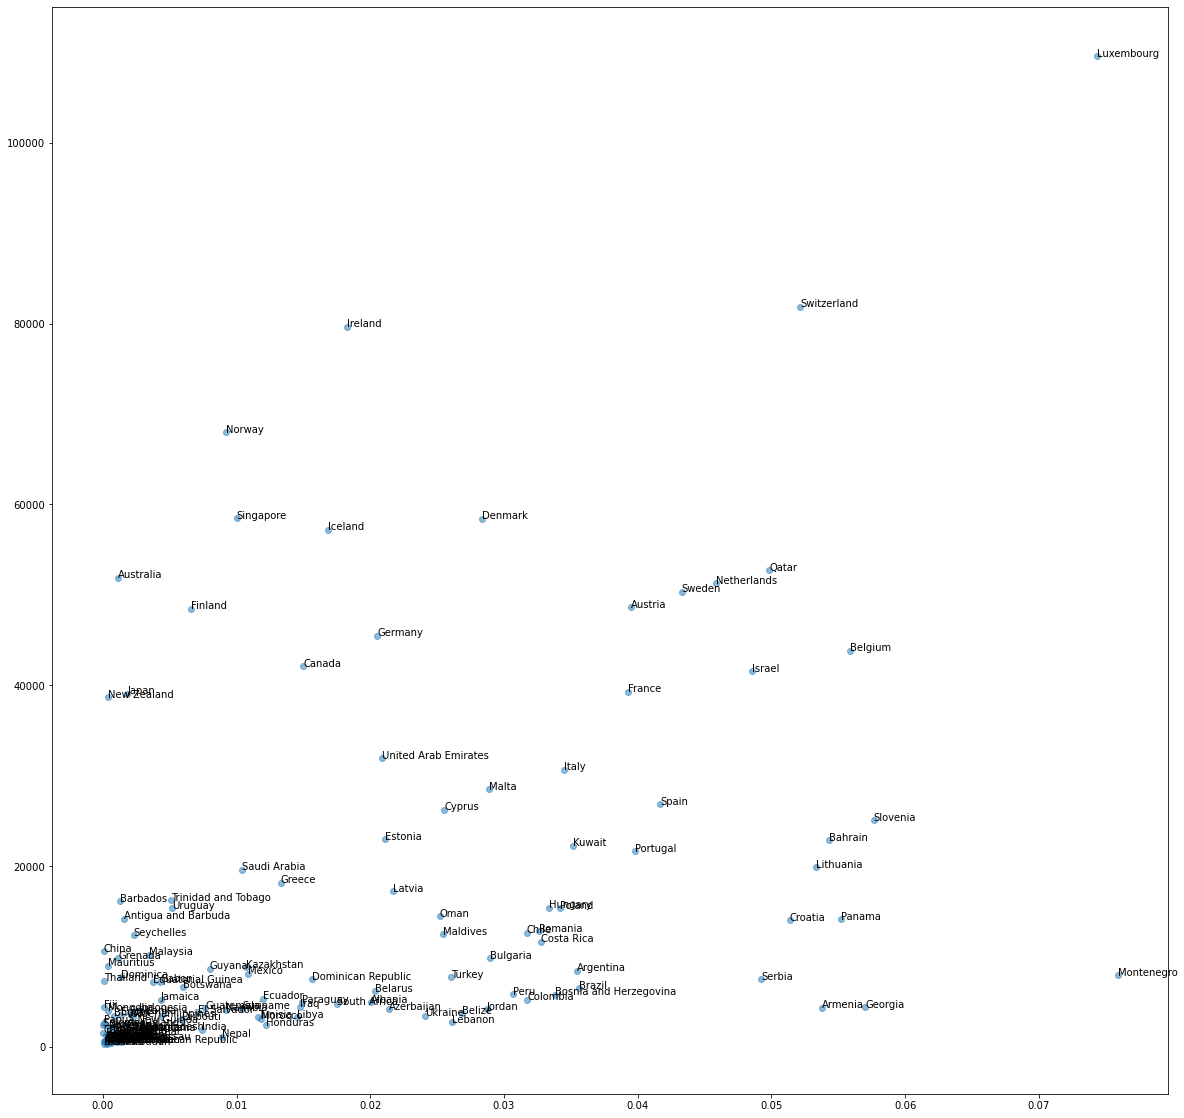

In [220]:
plt.figure(figsize=(20,20))

plt.scatter(x=df1['covid_percent_by_pop'], y=df1['GDP 2020'], label=df1['Country'], alpha=0.5)

for i in range(df1.shape[0]):
    plt.text(x=df1['covid_percent_by_pop'][i],y=df1['GDP 2020'][i],s=df1['Country'][i], 
#           fontdict=dict(color='red',size=10),
#           bbox=dict(facecolor='yellow',alpha=0.5)
            )
plt.show()

In [5]:
#Create a table of total cases and find daily new cases
df= pd.DataFrame(covid_data, columns = ['location', 'date', 'total_cases', 'population'])
df=df.sort_values(by=['location','date'])

In [6]:
# Add Daily Cases
df['daily_cases'] = np.nan
df['daily_cases'] = df.groupby('location')['total_cases'].diff()
df = df.fillna(0)

# Add Year and Month
df['Year'] = pd.DatetimeIndex(df['date']).year
df['Month'] = pd.DatetimeIndex(df['date']).month
df['Year_month'] = df['Year'].astype(str) + '_' + df['Month'].astype(str)

In [7]:
df.head()

,location,date,total_cases,population,daily_cases,Year,Month,Year_month
1,Afghanistan,1/1/20,0.0,38928341,0.0,2020,1,2020_1
10,Afghanistan,1/10/20,0.0,38928341,0.0,2020,1,2020_1
11,Afghanistan,1/11/20,0.0,38928341,0.0,2020,1,2020_1
12,Afghanistan,1/12/20,0.0,38928341,0.0,2020,1,2020_1
13,Afghanistan,1/13/20,0.0,38928341,0.0,2020,1,2020_1


In [102]:
# Select top 20 most populous country. Looking at 200 countries won't give any insights
# Might wanna try top wealthiest or by region, will need more data to join thou

top_pop = df.groupby('location')['population'].max().sort_values(ascending=False)
top_pop = top_pop[:20]

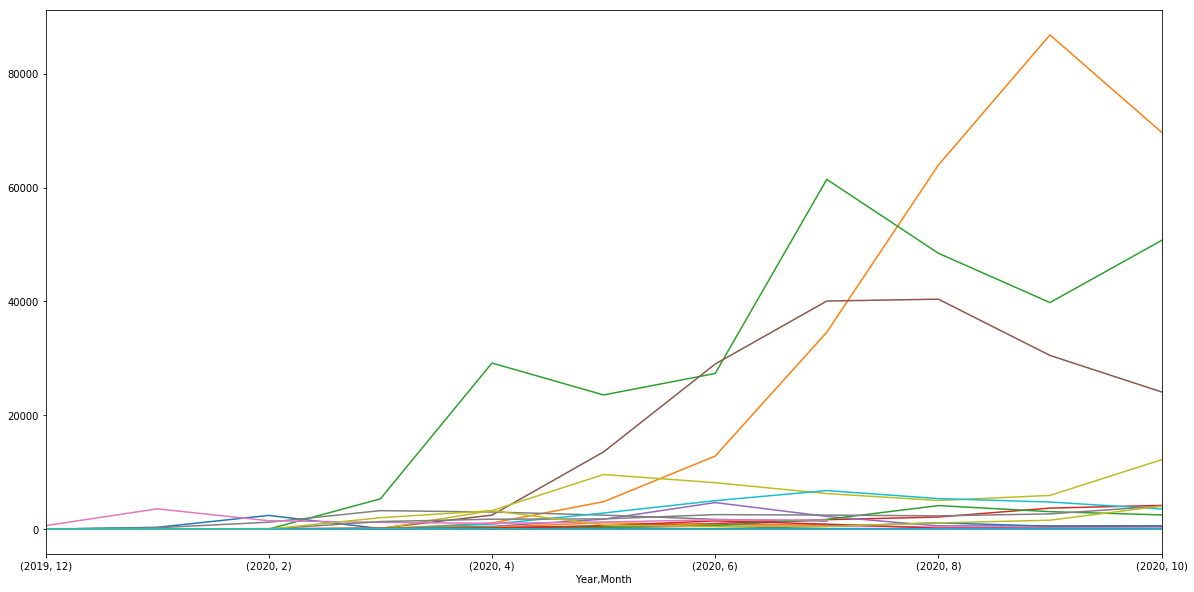

In [106]:
for country in top_pop.index:
    plot_df = df[df['location'] == country]
    plot_df.groupby(['Year', 'Month'])['daily_cases'].mean().plot(figsize=(20,10))